# LEVY FLIGHTS TEST
#### The purpose of this notebook is to study the Amazon Stock using the Levy Flights model

In [12]:
# IMPORTS
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import dates as mdates
import datetime as dt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [13]:
# DEFINITIONS

# Function for log returns
def lg_return(s):
    ###DOCSTRING Defines the log return for a stock price when it moves from s1 to s2###
    x = []
    for i in range(1,len(s)):
        x.append(np.log(s[i]) - np.log(s[i-1]))
    return x

# Mean (m), Variance (v), Median, Skewness, Kurtosis of log returns (r)
def mean(r):

    avg = 0
    for i in range(len(r)):
        avg += r[i]
    avg /= len(r) + 1
    return avg

def stdev(r,m):

    sum = 0
    for i in range(len(r)):
        sum += (r[i] - m)**2
    sum /= len(r)
    sum = np.sqrt(sum)
    return sum

def cube(x):
    ### HELPING FUNCTION TO FIND CUBE ROOT ###

    if x>=0: return x**(1./3.) # If circumvents python's inability to calculate non integer powers of negative numbers
    return -(-x)**(1./3.)

def drift(m,v):
    ### CALCULATE THE DRIFT OF A SERIES BASED ON VARIANCE AND MEAN ###

    return m - v/2

def skewness(r,m,v):

    sk = 0
    for i in range(len(r)):
        sk += (r[i] - m)**3
    sk /= len(r)*v**3
    return sk

def kurtosis(r,m,v):

    k = 0
    for i in range(len(r)):
        k += (r[i] - m)**4
    k /= len(r)*v**4
    return k

def vol(r):
    ### CALCULATE VOLATILITY OF RETURNS r AS ABSOLUTE VALUE OF r ###

    v = []
    for i in r:
        v.append(np.abs(i))
    return v

def cube(x):
    ### HELPING FUNCTION TO FIND CUBE ROOT ###

    if x>=0: return x**(1./3.) # If circumvents python's inability to calculate non integer powers of negative numbers
    return -(-x)**(1./3.)

def prediction(r,std,drft):
    ### FUNCTION FOR PREDICTING THE DAILY RETURNS OF A SPECIFIC STOCK FOR 1 YEAR KNOWING A SINGLE VALUE OF IT###

    pred = np.array([r])
    for i in range(1,253):
        flight = 1
        if np.random.randint(100) == 0:
            flight = 20
        val = pred[i-1]*np.exp(drft+flight*std*np.random.normal(loc=0.0,scale=1.0))
        pred = np.append(pred,val)
    return pred

def error_func(s,pred):
    ### PERCENT ERROR FUNCTION ###

    err = np.array([])
    for i in range(1,253):
        val = np.abs(s[i-252] - pred[i])/s[i-252]
        err = np.append(err,val)
    return err

def mape_func(x):
    ### FUNCTION TO FIND MAPE ERROR OF PREDICTION BASED ON ERROR X ###

    my_sum = 0
    for i in x:
        my_sum += i
    my_sum /= 252
    return my_sum

In [14]:
# READ DATA FROM CSV FILE

amzn = pd.read_csv("AMZN.csv",header=0)
s_amzn = np.array(amzn.loc[:,"Close"].to_list())

# CALCULATIONS

r_amzn = lg_return(s_amzn)
m_amzn = mean(r_amzn)
std_amzn = stdev(r_amzn,m_amzn)
var_amzn = std_amzn**2
drift_amzn = drift(m_amzn,var_amzn)
days = np.array(amzn.loc[:,"Date"].to_list())
days = np.delete(days,range(len(days)-253))
days_returns = np.delete(days, 0)
day = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in days]
day_r = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in days_returns]

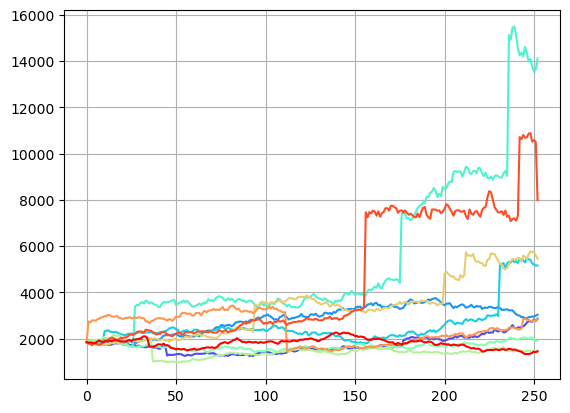

<Figure size 640x480 with 0 Axes>

In [15]:
# PREDICTIONS FOR A YEAR
s = s_amzn[-253]

pred1 = prediction(s,std_amzn,drift_amzn)

pred2 = prediction(s,std_amzn,drift_amzn)

pred3 = prediction(s,std_amzn,drift_amzn)

pred4 = prediction(s,std_amzn,drift_amzn)

pred5 = prediction(s,std_amzn,drift_amzn)

pred6 = prediction(s,std_amzn,drift_amzn)

pred7 = prediction(s,std_amzn,drift_amzn)

pred8 = prediction(s,std_amzn,drift_amzn)

pred9 = prediction(s,std_amzn,drift_amzn)

pred10 = prediction(s,std_amzn,drift_amzn)

cmap = cm.rainbow
plt.plot(pred1,color = cmap(1.0/10.0))
plt.plot(pred2,color = cmap(2.0/10.0))
plt.plot(pred3,color = cmap(3.0/10.0))
plt.plot(pred4,color = cmap(4.0/10.0))
plt.plot(pred5,color = cmap(5.0/10.0))
plt.plot(pred6,color = cmap(6.0/10.0))
plt.plot(pred7,color = cmap(7.0/10.0))
plt.plot(pred8,color = cmap(8.0/10.0))
plt.plot(pred9,color = cmap(9.0/10.0))
plt.plot(pred10,color = cmap(10.0/10.0))
plt.grid(True)
plt.show()
plt.clf()

In [16]:
# Errors

err1 = error_func(s_amzn,pred1)
err2 = error_func(s_amzn,pred2)
err3 = error_func(s_amzn,pred3)
err4 = error_func(s_amzn,pred4)
err5 = error_func(s_amzn,pred5)
err6 = error_func(s_amzn,pred6)
err7 = error_func(s_amzn,pred7)
err8 = error_func(s_amzn,pred8)
err9 = error_func(s_amzn,pred9)
err10 = error_func(s_amzn,pred10)

# MAPE
mape1 = mape_func(err1)
print(mape1)
mape2 = mape_func(err2)
print(mape2)
mape3 = mape_func(err3)
print(mape3)
mape4 = mape_func(err4)
print(mape4)
mape5 = mape_func(err5)
print(mape5)
mape6 = mape_func(err6)
print(mape6)
mape7 = mape_func(err7)
print(mape7)
mape8 = mape_func(err8)
print(mape8)
mape9 = mape_func(err9)
print(mape9)
mape10 = mape_func(err10)
print(mape10)

0.34417337223574235
0.09239922692618432
0.23318715574326843
0.9608197461317027
0.34850122398107314
0.438130816414081
0.25155004464818576
0.40943886069627405
0.6218827620440793
0.29846643340397977


In [17]:
# AVERAGE PREDICTION
avg_pred = (pred1 + pred2 + pred3 + pred4 + pred5 + pred6 + pred7 + pred8 + pred9 + pred10)/10
up20 = avg_pred[0] + 0.2*avg_pred[0]
up40 = avg_pred[0] + 0.4*avg_pred[0]
down20 = avg_pred[0] - 0.2*avg_pred[0]
down40 = avg_pred[0] - 0.4*avg_pred[0]
count_up20 = 0
count_up40 = 0
count_down20 = 0
count_down40 = 0
for i in avg_pred:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
count_up20 /= 252
count_up40 /= 252
count_down20 /= 252
count_down40 /= 252

print("Propability of up 20%: {}\nPropability of up 40%: {}\nPropability of down 20%: {}\nPropability of down 40%: {}".format(count_up20,count_up40,count_down20,count_down40))

Propability of up 20%: 0.7182539682539683
Propability of up 40%: 0.38492063492063494
Propability of down 20%: 0.0
Propability of down 40%: 0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


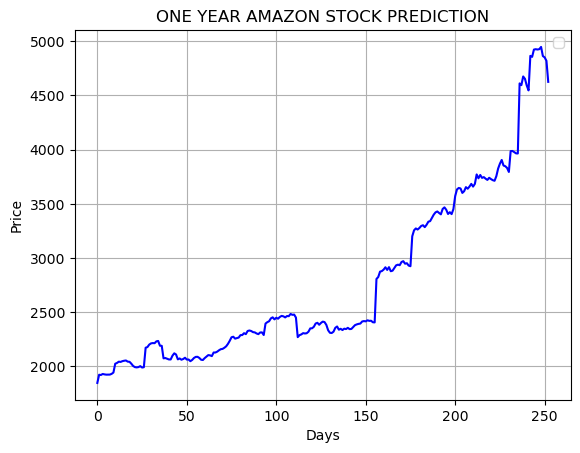

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(avg_pred,color='b')
plt.grid(True)
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("ONE YEAR AMAZON STOCK PREDICTION")
plt.legend()
plt.show()
plt.clf()

In [19]:
# STATISTICAL DATA
r_pred = lg_return(avg_pred)
vol_pred = vol(r_pred)
mean_pred = mean(r_pred)
stdev_pred = stdev(r_pred,mean_pred)
skew_pred = skewness(r_pred,mean_pred,stdev_pred)
kurt_pred = kurtosis(r_pred,mean_pred,stdev_pred)

print("\t\t\t\t\t\t\t\t\t------- PREDICTION DATA -------\n\nMean: {}\t|\tStandard Deviation: {}\t|\tSkewness: {}\t|\tKurtosis: {}\n".format(mean_pred,stdev_pred,skew_pred,kurt_pred))

									------- PREDICTION DATA -------

Mean: 0.0036259960224859604	|	Standard Deviation: 0.019489790517744465	|	Skewness: 4.010515044553071	|	Kurtosis: 32.3077679120106



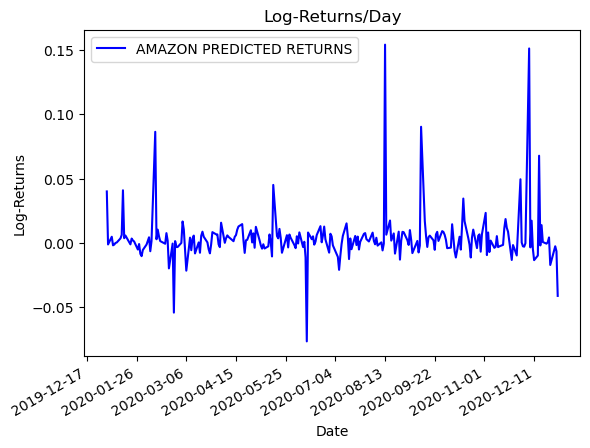

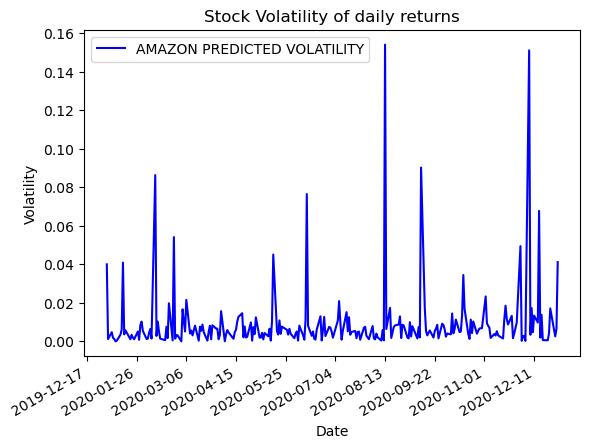

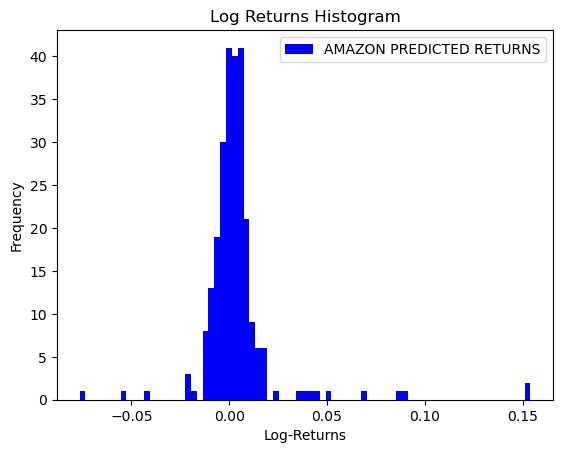

<Figure size 640x480 with 0 Axes>

In [20]:
### RETURNS
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))
plt.plot(day_r,r_pred,color='b',label='AMAZON PREDICTED RETURNS')
plt.xlabel("Date")
plt.ylabel("Log-Returns")
plt.title("Log-Returns/Day")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()
plt.clf()

### VOLATILITY
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))
plt.plot(day_r,vol_pred,color='b',label='AMAZON PREDICTED VOLATILITY')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Volatility of daily returns")
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()
plt.clf()

### HISTOGRAM. Binning method used: Freedman-Diaconis Method 1981 (bins = (max - min)/(2*IQR/cube_root(n)))

#### Calculate the number of bins
q3, q1 = np.percentile(r_pred, [75,25]) # np.percentile(array, [x,y]) yields the values of array[i] and array[j] where i and j are the xth and yth percentile
iqr = q3 - q1
bns = round((max(r_pred) - min(r_pred))/(2*iqr/cube(len(r_pred)))) # Number of bins

plt.hist(r_pred,bins=bns,color='b',label='AMAZON PREDICTED RETURNS')
plt.xlabel("Log-Returns")
plt.ylabel("Frequency")
plt.title("Log Returns Histogram")
plt.legend()
plt.show()
plt.clf()

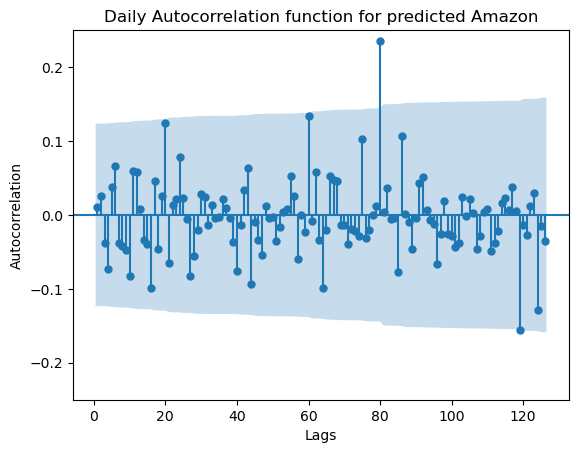

<Figure size 640x480 with 0 Axes>

In [21]:
# AUTOCORRELATION
acf_pred = sm.tsa.acf(r_pred, nlags=len(r_pred)//2)
tsaplots.plot_acf(r_pred,lags=len(r_pred)//2,label='AMAZON PREDICTED AUTOCORRELATION',zero=False,alpha=0.05)
ax = plt.gca()
ax.set_ylim(-0.25,0.25)
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.title("Daily Autocorrelation function for predicted Amazon")
plt.show()
plt.clf()

In [22]:
# Propabilities on predictions not averages
count_up20 = 0
count_up40 = 0
count_down20 = 0
count_down40 = 0
for i in pred1:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred2:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred3:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1

for i in pred4:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred5:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred6:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred7:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred8:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred9:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1
        
for i in pred10:
    if i>up40:
        count_up40 += 1
    if i>up20:
        count_up20 += 1
    if i<down40:
        count_down40 += 1
    if i<down20:
        count_down20 += 1

count_up20 /= 2520
count_up40 /= 2520
count_down20 /= 2520
count_down40 /= 2520

print("Propability of up 20%: {}\nPropability of up 40%: {}\nPropability of down 20%: {}\nPropability of down 40%: {}".format(count_up20,count_up40,count_down20,count_down40))

Propability of up 20%: 0.4662698412698413
Propability of up 40%: 0.3599206349206349
Propability of down 20%: 0.10555555555555556
Propability of down 40%: 0.011111111111111112


### The same process was repeated over $100$ repetitions in order to obtain a much clearer trend

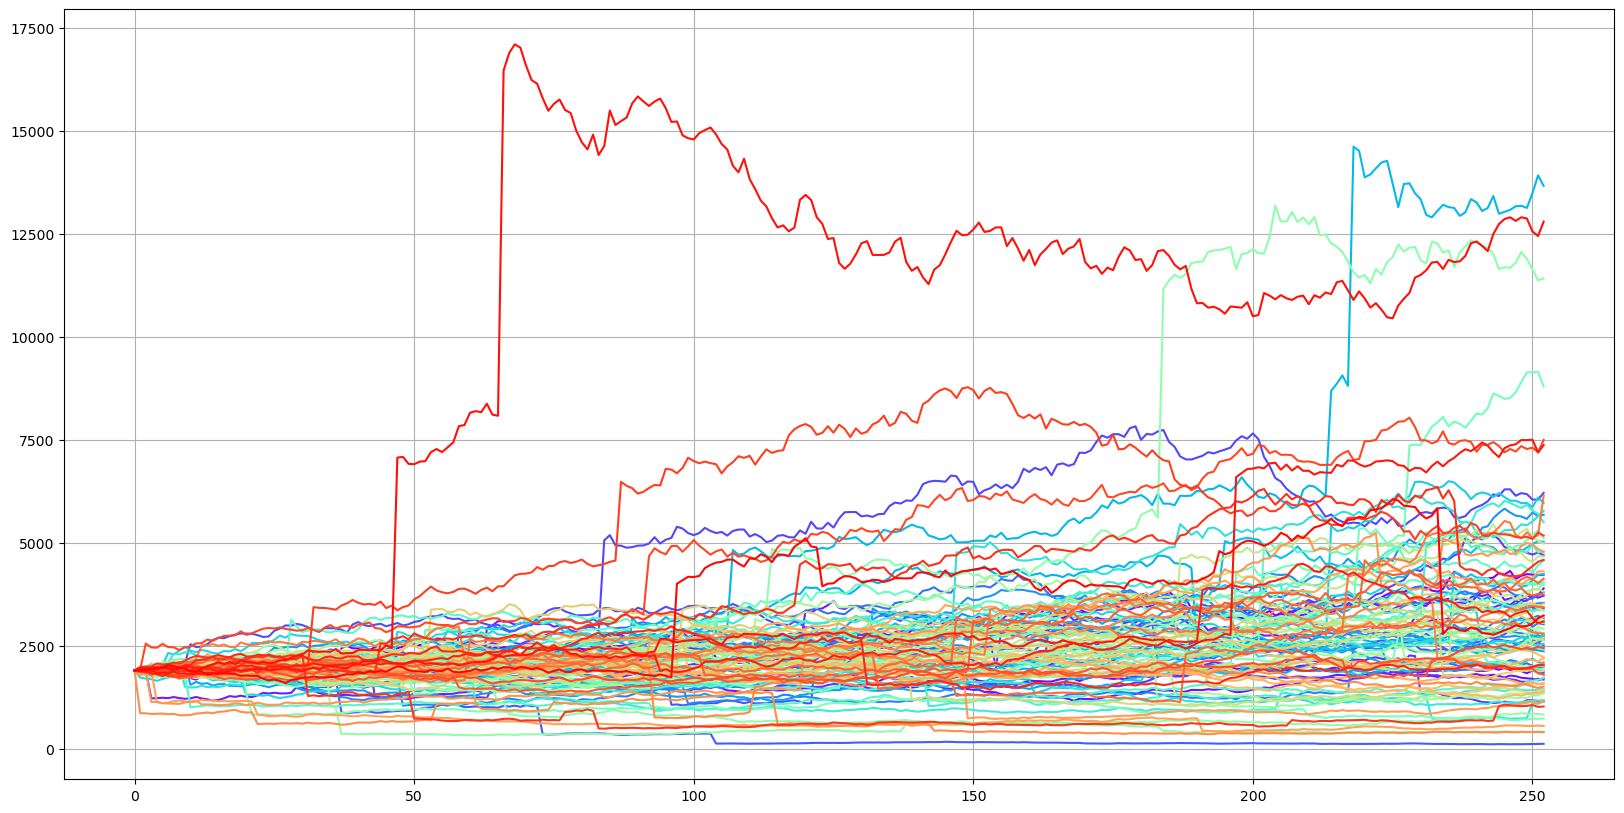

<Figure size 2000x1000 with 0 Axes>

In [23]:
s = s_amzn[252]
plt.rcParams['figure.figsize'] = [20,10]
pred = np.array([])
for i in range(100):
    p = prediction(s,std_amzn,drift_amzn)
    if i==0:
        pred = np.append(pred,p)
    else:
        pred = np.vstack((pred,p))
    p = []

for i in range(len(pred)):
    plt.plot(pred[i],color=cmap(i/float(len(pred))))
plt.grid(True)
plt.show()
plt.clf()
plt.rc
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [24]:
# PROPABILITIES OF AVERAGE
avg_pred = pred[0]
for i in range(1,len(pred)):
    avg_pred += pred[i]
avg_pred /= len(pred)
up20 = avg_pred[0] + 0.2*avg_pred[0]
up40 = avg_pred[0] + 0.4*avg_pred[0]
down20 = avg_pred[0] - 0.2*avg_pred[0]
down40 = avg_pred[0] - 0.4*avg_pred[0]
count_up20 = 0
count_up40 = 0
count_down20 = 0
count_down40 = 0
for i in avg_pred:
    if i>=up40:
        count_up40 += 1
    if i>=up20:
        count_up20 += 1
    if i<=down40:
        count_down40 += 1
    if i<=down20:
        count_down20 += 1
        
count_up20 /= 252.0
count_up40 /= 252.0
count_down20 /= 252.0
count_down40 /= 252.0

print("Propability of up 20%: {}\nPropability of up 40%: {}\nPropability of down 20%: {}\nPropability of down 40%: {}".format(count_up20,count_up40,count_down20,count_down40))

Propability of up 20%: 0.6388888888888888
Propability of up 40%: 0.3531746031746032
Propability of down 20%: 0.0
Propability of down 40%: 0.0


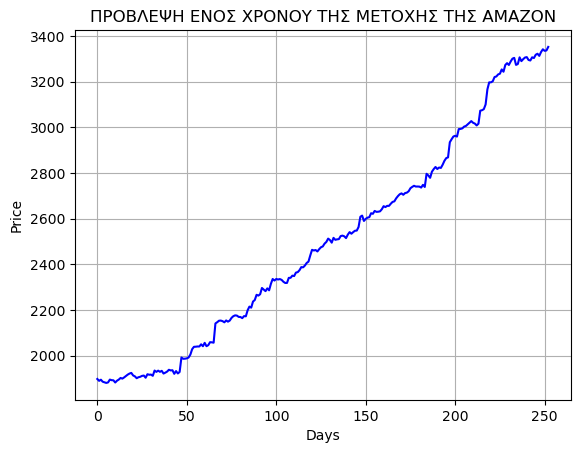

<Figure size 640x480 with 0 Axes>

In [25]:
plt.plot(avg_pred,color='b')
plt.grid(True)
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("ΠΡΟΒΛΕΨΗ ΕΝΟΣ ΧΡΟΝΟΥ ΤΗΣ ΜΕΤΟΧΗΣ ΤΗΣ AMAZON")
plt.show()
plt.clf()

In [26]:
# PROPABILITIES
count_up20 = 0
count_up40 = 0
count_down20 = 0
count_down40 = 0
count = 0
for i in pred:
    for s in i:
        count += 1
        if s>=up40:
            count_up40 += 1
        if s>=up20:
            count_up20 += 1
        if s<=down40:
            count_down40 += 1
        if s<=down20:
            count_down20 += 1

count_up20 /= count
count_up40 /= count
count_down20 /= count
count_down40 /= count

print("Propability of up 20%: {}\nPropability of up 40%: {}\nPropability of down 20%: {}\nPropability of down 40%: {}".format(count_up20,count_up40,count_down20,count_down40))


Propability of up 20%: 0.4243873517786561
Propability of up 40%: 0.29122529644268774
Propability of down 20%: 0.14889328063241106
Propability of down 40%: 0.08189723320158103
